In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import pickle

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Concatenate
from keras import Input

from keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau
from keras.losses import SparseCategoricalCrossentropy


Load data - do testowania równie dobrze można załadować bezpośrednio: 

In [3]:
labels_table = pd.DataFrame(zip([i for i in range(10)],['t-shirt/top', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']), columns=['label', 'description'])
labels_table.set_index('label')

train, test = keras.datasets.fashion_mnist.load_data()
images_test, labels_test = test
images_test = images_test/255.0
labels_test = labels_test.astype(np.int32)

X_test, y_test = images_test, labels_test

Przyporządkowanie nazw numerom klas

In [4]:
def cloth_name(index):
    return labels_table['description'].loc[labels_table['label']==index].values[0]
cloth_names = list(map(cloth_name, y_test))

Wczytanie modelu

In [6]:
model = keras.models.load_model("model.keras")

In [7]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_13 (Flatten)        (None, 784)                  0         ['input_14[0][0]']            
                                                                                                  
 hidden_1 (Dense)            (None, 320)                  251200    ['flatten_13[0][0]']          
                                                                                                  
 hidden_2 (Dense)            (None, 160)                  51360     ['hidden_1[0][0]']            
                                                                                           

Przewidywania na danych testowych

In [8]:
predictions = model.predict(X_test, verbose=0)
y_pred = np.argmax(predictions, axis=1)
y_pred_prob = np.max(predictions, axis=1)

In [9]:
cloth_names_pred = list(map(cloth_name, y_pred))

Ewaluacja modelu

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.987160861492157
Test accuracy: 0.8801000118255615


#### Wybierz losowy ciuch

In [14]:
item = int(input(f'Choose a random integer between 0 and {y_pred.shape[0]-1}: '))
print(f"You've chosen: {cloth_names_pred[item]}")

You've chosen: pullover


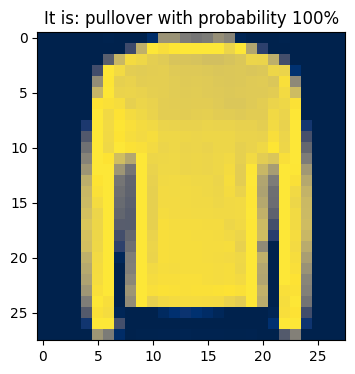

In [15]:
plt.figure(figsize=(4,4))
plt.title(f"It is: {cloth_names_pred[item]} with probability {y_pred_prob[item]:.0%}")
plt.imshow(X_test[item], cmap='cividis')
plt.show()

In [16]:
cm = confusion_matrix(y_pred, y_test)

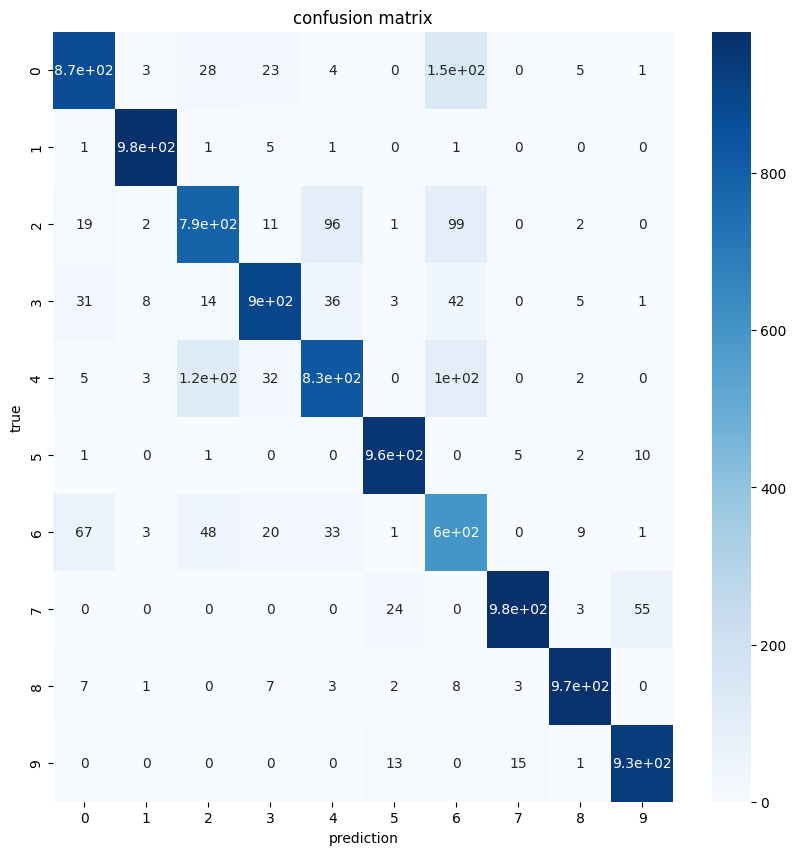

In [56]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('confusion matrix')
ax.set_xlabel('prediction')
ax.set_ylabel('true')
plt.show()